# SVM

In [101]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [102]:
data = pd.read_csv('D1.csv')

In [103]:
data

,humidity,precipMM,tempC,HeatStroke
0,72,0.0,18,0
1,72,0.0,19,0
2,72,0.0,18,0
3,72,0.0,18,0
4,68,0.0,20,0
...,...,...,...,...
116131,28,0.0,30,1
116132,29,0.0,29,0
116133,30,0.0,27,0
116134,31,0.0,26,0


In [104]:

data.describe()

,humidity,precipMM,tempC,HeatStroke
count,116136.000000,116136.000000,116136.000000,116136.000000
mean,57.646001,0.231727,25.304720,0.112489
std,25.316012,0.802657,4.659629,0.315968
min,4.000000,0.000000,11.000000,0.000000
25%,36.000000,0.000000,22.000000,0.000000
50%,58.000000,0.000000,24.000000,0.000000
75%,82.000000,0.100000,28.000000,0.000000
max,100.000000,25.700000,43.000000,1.000000


In [105]:
data = data.head(100000)
data.groupby('HeatStroke').mean()

,humidity,precipMM,tempC
HeatStroke,,,
0,62.268978,0.25337,24.202384
1,19.278506,0.00986,34.138696


In [106]:

# separating the data and labels
X = data.drop(columns = 'HeatStroke', axis=1)
Y = data['HeatStroke']


In [107]:
print(X,Y)

       humidity  precipMM  tempC
0            72       0.0     18
1            72       0.0     19
2            72       0.0     18
3            72       0.0     18
4            68       0.0     20
...         ...       ...    ...
99995        18       0.0     36
99996        14       0.0     38
99997        15       0.0     38
99998        16       0.0     38
99999        18       0.0     39

[100000 rows x 3 columns] 0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: HeatStroke, Length: 100000, dtype: int64


In [108]:

scaler = StandardScaler()

In [109]:

scaler.fit(X)


StandardScaler()

In [110]:

standardized_data = scaler.transform(X)

In [111]:
print(standardized_data)

[[ 0.57886436 -0.29172471 -1.55770795]
 [ 0.57886436 -0.29172471 -1.34612753]
 [ 0.57886436 -0.29172471 -1.55770795]
 ...
 [-1.65820917 -0.29172471  2.67390046]
 [-1.61896226 -0.29172471  2.67390046]
 [-1.54046845 -0.29172471  2.88548088]]


In [112]:

X = standardized_data
Y = data['HeatStroke']

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [114]:

print(X.shape, X_train.shape, X_test.shape)

(100000, 3) (80000, 3) (20000, 3)


In [115]:

classifier = svm.SVC(kernel='linear')

In [116]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

In [117]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [118]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9771875


In [119]:

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [120]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9778


In [121]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calculate predictions
Y_train_prediction = classifier.predict(X_train)
Y_test_prediction = classifier.predict(X_test)

# Calculate precision, recall, and F1-score for training data
train_precision = precision_score(Y_train, Y_train_prediction)
train_recall = recall_score(Y_train, Y_train_prediction)
train_f1_score = f1_score(Y_train, Y_train_prediction)

# Calculate precision, recall, and F1-score for test data
test_precision = precision_score(Y_test, Y_test_prediction)
test_recall = recall_score(Y_test, Y_test_prediction)
test_f1_score = f1_score(Y_test, Y_test_prediction)

# Print evaluation metrics for both training and test data
print("Training Data:")
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1_score)
print("\nTest Data:")
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1_score)

# Classification report
print("\nClassification Report for Test Data:")
print(classification_report(Y_test, Y_test_prediction))

# Confusion Matrix
print("\nConfusion Matrix for Test Data:")
print(confusion_matrix(Y_test, Y_test_prediction))


Training Data:
Precision: 0.9077390643655704
Recall: 0.8955879203255515
F1-score: 0.9016225540402134

Test Data:
Precision: 0.9063171465406102
Recall: 0.9032119914346896
F1-score: 0.9047619047619048

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17665
           1       0.91      0.90      0.90      2335

    accuracy                           0.98     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.98      0.98      0.98     20000


Confusion Matrix for Test Data:
[[17447   218]
 [  226  2109]]


In [125]:
# Prompt user for input
humidity = float(input("Enter humidity (0-100): "))
precipitation = float(input("Enter precipitation in mm: "))
temperature = float(input("Enter temperature in Celsius: "))

# Create input data array
input_data = np.array([[humidity, precipitation, temperature]])

# Standardize input data
input_data_standardized = scaler.transform(input_data)

# Predict output
predicted_output = classifier.predict(input_data_standardized)

# Display prediction to user
if predicted_output[0] == 1:
    print("Based on the input, there is a high likelihood of heatstroke occurrence.")
else:
    print("Based on the input, heatstroke is less likely to occur.")


Enter humidity (0-100):  15.3
Enter precipitation in mm:  0.0001
Enter temperature in Celsius:  32.3


Based on the input, there is a high likelihood of heatstroke occurrence.


C:\Users\Pranav\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


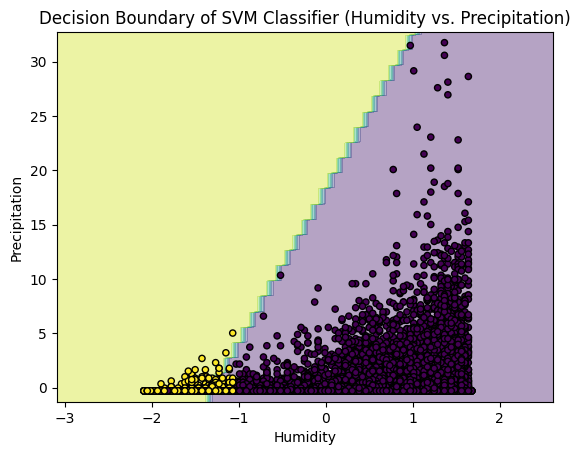

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot decision boundary
def plot_decision_boundary(X, y, clf):
    # Create a meshgrid of feature values
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Make predictions on meshgrid points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel('Humidity')
    plt.ylabel('Precipitation')
    plt.title('Decision Boundary of SVM Classifier (Humidity vs. Precipitation)')
    plt.show()

# Fit SVM classifier to the selected features (humidity and precipitation)
classifier.fit(X_train[:, :2], Y_train)

# Plot decision boundary
plot_decision_boundary(X_train[:, :2], Y_train, classifier)
